Project I | Deep Learning: Image Classification with CNN
Task Description
Students will build a Convolutional Neural Network (CNN) model to classify images from a given dataset into predefined categories/classes.

Datasets
The dataset for this task is the CIFAR-10 dataset, which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. 

Data Preprocessing

Data loading and preprocessing (e.g., normalization, resizing, augmentation).


Create visualizations of some images, and labels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:

print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)
print(x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
4
uint8
(10000, 32, 32, 3)


In [4]:
print (y_test.shape)
print (y_test.ndim)
print (y_test.dtype)
print (y_train.shape)
print (y_train.ndim)
print (y_train.dtype)

(10000, 1)
2
uint8
(50000, 1)
2
uint8


In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()


In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(y_train[0])
print(y_test[0])

In [ ]:
print(x_train[0])
print(x_test[0])
print(x_test[0])

In [ ]:
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

y_labels = np.argmax(y_train, axis=1)

# Plot 10x10 grid
fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# For each class (0 to 9)
for class_id in range(10):
    # Get all indices of that class
    idxs = np.where(y_labels == class_id)[0]
    # Choose 10 random samples from that class
    selected_idxs = np.random.choice(idxs, 10, replace=False)

    for i in range(10):
        ax = axes[class_id, i]
        ax.imshow(x_train[selected_idxs[i]])
        ax.axis('off')
        if i == 0:
            ax.set_title(class_names[class_id], fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimized CNN Baseline (with Data Aug, BatchNorm, LR Scheduling)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.backend import clear_session

# Clear session
clear_session()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5),
    ModelCheckpoint('cnn_optimized_baseline.h5', monitor='val_loss', save_best_only=True)
]

model.fit(datagen.flow(x_train, y_train, batch_size=64),
          validation_data=(x_test, y_test),
          epochs=50,
          callbacks=callbacks)


 Transfer Learning (Freeze pretrained base, train classifier)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load MobileNetV2 without the top
base_model = MobileNetV2(include_top=False, input_shape=(32, 32, 3), weights='imagenet')
base_model.trainable = False  # Freeze

# Add new classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

transfer_model = Model(inputs=base_model.input, outputs=outputs)

transfer_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5),
    ModelCheckpoint('mobilenet_transfer_frozen.h5', monitor='val_loss', save_best_only=True)
]

transfer_model.fit(datagen.flow(x_train, y_train, batch_size=64),
                   validation_data=(x_test, y_test),
                   epochs=20,
                   callbacks=callbacks)


In [ ]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input

# base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(128, activation='relu')(x)
# predictions = Dense(10, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

# # Freeze base model for transfer learning
# for layer in base_model.layers:
#     layer.trainable = False

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train only the new top layers first
# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# # Then unfreeze and fine-tune everything
# for layer in model.layers:
#     layer.trainable = True

# model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)


Fine-Tune Pretrained Base (Unfreeze + Low LR)

In [ ]:
# Unfreeze some or all base layers
base_model.trainable = True

# Compile again with LOW learning rate
transfer_model.compile(optimizer=Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Fine-tuning callbacks
fine_tune_callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6),
    ModelCheckpoint('mobilenet_finetuned_best.h5', monitor='val_loss', save_best_only=True)
]

# Fine-tune training
transfer_model.fit(datagen.flow(x_train, y_train, batch_size=64),
                   validation_data=(x_test, y_test),
                   epochs=20,
                   callbacks=fine_tune_callbacks)


Final Output:
cnn_optimized_baseline.h5 → Your custom CNN baseline

mobilenet_transfer_frozen.h5 → Transfer learning (frozen base)

mobilenet_finetuned_best.h5 → Final fine-tuned model (best performance)

Load Models and Evaluate on Test Set

In [ ]:
from tensorflow.keras.models import load_model

# Load saved models
cnn_model = load_model('cnn_optimized_baseline.h5')
transfer_model = load_model('mobilenet_transfer_frozen.h5')
finetuned_model = load_model('mobilenet_finetuned_best.h5')

# Evaluate all models
for name, model in zip(['CNN Baseline', 'Transfer (Frozen)', 'Fine-Tuned Transfer'],
                       [cnn_model, transfer_model, finetuned_model]):
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} → Accuracy: {acc:.4f}, Loss: {loss:.4f}")


dict_keys(['accuracy', 'loss'])


 Plot Training History

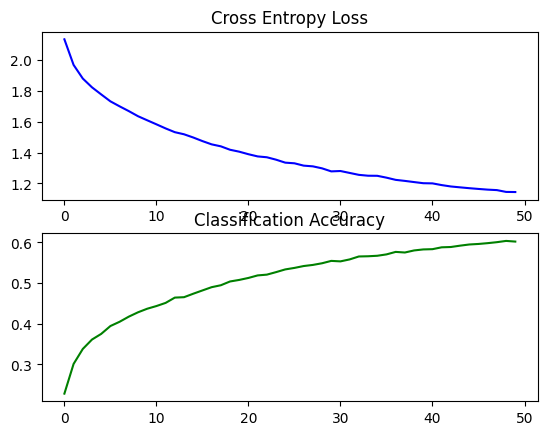

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title='Model'):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call like:
# plot_history(history_cnn, "CNN Baseline")
# plot_history(history_transfer, "Transfer Learning")
# plot_history(history_finetuned, "Fine-Tuned")


Confusion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict
y_pred = np.argmax(finetuned_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.title("Fine-Tuned Model Confusion Matrix")
plt.show()


Evaluation Plan with EfficientNetB0
1. Load EfficientNetB0 as Base
We exclude the top layer and freeze the base.

2. Add a Custom Classification Head
For CIFAR-10 (10 classes).

3. Train with Frozen Base (Feature Extraction)
4. Unfreeze & Fine-Tune (Optional)
5. Evaluate Accuracy on Test Set


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resize CIFAR-10 to match EfficientNet's expected input
from tensorflow.image import resize
x_train_resized = resize(x_train, (224, 224))
x_test_resized = resize(x_test, (224, 224))

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_resized)

# Load base model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

# Build model
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
checkpoint = ModelCheckpoint('efficientnetb0_best.h5', save_best_only=True)

# Train
history = model.fit(
    datagen.flow(x_train_resized, y_train, batch_size=64),
    validation_data=(x_test_resized, y_test),
    epochs=30,
    callbacks=[early_stop, lr_reduce, checkpoint]
)

# Evaluate
loss, acc = model.evaluate(x_test_resized, y_test, verbose=0)
print(f"EfficientNetB0 → Accuracy: {acc:.4f}, Loss: {loss:.4f}")
# Your code here :

Fine-Tuning EfficientNetB0 (Unfreeze Base Model)
Load the trained model (best weights saved earlier)

Unfreeze some or all layers of EfficientNetB0

Recompile with a lower learning rate

Continue training for a few more epochs

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

# Load best model from previous training
model = load_model('efficientnetb0_best.h5')

# Unfreeze the base model
model.layers[1].trainable = True  # model.layers[1] is base_model inside your functional model

# Recompile with a very low learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Optional: Print how many layers are now trainable
print(f"Trainable layers: {len([l for l in model.layers if l.trainable])} / {len(model.layers)}")

# Continue training
fine_tune_history = model.fit(
    datagen.flow(x_train_resized, y_train, batch_size=64),
    validation_data=(x_test_resized, y_test),
    epochs=10,
    callbacks=[early_stop, lr_reduce, checkpoint]
)

# Final evaluation
final_loss, final_acc = model.evaluate(x_test_resized, y_test, verbose=0)
print(f"Fine-Tuned EfficientNetB0 → Accuracy: {final_acc:.4f}, Loss: {final_loss:.4f}")


Transfer Learning with ResNet50
Load ResNet50 with pretrained weights.

Freeze the base model layers.

Add a custom classification head.

Compile and train for feature extraction.

Fine-tune by unfreezing some layers and continuing training.



In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resize CIFAR-10 to match ResNet's input size
x_train_resized = resize(x_train, (224, 224))
x_test_resized = resize(x_test, (224, 224))

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_resized)

# Load base model
base_model_resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model_resnet.trainable = False  # Freeze base

# Build model
inputs = Input(shape=(224, 224, 3))
x = base_model_resnet(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)
model_resnet = Model(inputs, outputs)

# Compile model
model_resnet.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
checkpoint = ModelCheckpoint('resnet50_best.h5', save_best_only=True)

# Train model
history_resnet = model_resnet.fit(
    datagen.flow(x_train_resized, y_train, batch_size=64),
    validation_data=(x_test_resized, y_test),
    epochs=30,
    callbacks=[early_stop, lr_reduce, checkpoint]
)

# Evaluate model
loss_resnet, acc_resnet = model_resnet.evaluate(x_test_resized, y_test, verbose=0)
print(f"ResNet50 → Accuracy: {acc_resnet:.4f}, Loss: {loss_resnet:.4f}")


Transfer Learning with VGG16
Steps:
Load VGG16 with pretrained weights.

Freeze base model layers.

Add a custom classification head.

Compile and train for feature extraction.

Fine-tune by unfreezing layers.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resize CIFAR-10 to match VGG16's input size
x_train_resized = resize(x_train, (224, 224))
x_test_resized = resize(x_test, (224, 224))

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_resized)

# Load base model
base_model_vgg = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model_vgg.trainable = False  # Freeze base

# Build model
inputs = Input(shape=(224, 224, 3))
x = base_model_vgg(inputs, training=False)
x = Flatten()(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)
model_vgg = Model(inputs, outputs)

# Compile model
model_vgg.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)
checkpoint = ModelCheckpoint('vgg16_best.h5', save_best_only=True)

# Train model
history_vgg = model_vgg.fit(
    datagen.flow(x_train_resized, y_train, batch_size=64),
    validation_data=(x_test_resized, y_test),
    epochs=30,
    callbacks=[early_stop, lr_reduce, checkpoint]
)

# Evaluate model
loss_vgg, acc_vgg = model_vgg.evaluate(x_test_resized, y_test, verbose=0)
print(f"VGG16 → Accuracy: {acc_vgg:.4f}, Loss: {loss_vgg:.4f}")


Plot Accuracy & Loss Curves

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(12, 6))
plt.plot(history_efficientnet.history['accuracy'], label='EfficientNetB0 - Train Accuracy')
plt.plot(history_resnet.history['accuracy'], label='ResNet50 - Train Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG16 - Train Accuracy')
plt.plot(history_efficientnet.history['val_accuracy'], label='EfficientNetB0 - Val Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='ResNet50 - Val Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG16 - Val Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss comparison
plt.figure(figsize=(12, 6))
plt.plot(history_efficientnet.history['loss'], label='EfficientNetB0 - Train Loss')
plt.plot(history_resnet.history['loss'], label='ResNet50 - Train Loss')
plt.plot(history_vgg.history['loss'], label='VGG16 - Train Loss')
plt.plot(history_efficientnet.history['val_loss'], label='EfficientNetB0 - Val Loss')
plt.plot(history_resnet.history['val_loss'], label='ResNet50 - Val Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG16 - Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import tensorflow as tf

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names, model_name):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Get the model predictions (for each model)
y_pred_efficientnet = model_efficientnet.predict(x_test_resized)
y_pred_resnet = model_resnet.predict(x_test_resized)
y_pred_vgg = model_vgg.predict(x_test_resized)

# Convert predictions to class labels
y_pred_efficientnet = np.argmax(y_pred_efficientnet, axis=1)
y_pred_resnet = np.argmax(y_pred_resnet, axis=1)
y_pred_vgg = np.argmax(y_pred_vgg, axis=1)

# Get the true labels
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrices
cm_efficientnet = confusion_matrix(y_true, y_pred_efficientnet)
cm_resnet = confusion_matrix(y_true, y_pred_resnet)
cm_vgg = confusion_matrix(y_true, y_pred_vgg)

# Plot confusion matrices
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrices for each model
plot_confusion_matrix(cm_efficientnet, class_names, 'EfficientNetB0')
plot_confusion_matrix(cm_resnet, class_names, 'ResNet50')
plot_confusion_matrix(cm_vgg, class_names, 'VGG16')


📊 Analysis
Accuracy vs Loss:

Which model reaches higher accuracy and lower loss?

Are there any clear signs of overfitting in any of the models?

Confusion Matrix:

Which classes do the models classify well and which they struggle with?

Are there any specific classes that are confused with others across models?

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# Your code here :

In [ ]:
# Your code here :